# PCA plots

In [1]:
library(tidyverse)
library(data.table)
library(gridExtra)
setwd('~/snap_hap_repHZ/pca')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘data.table’


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [2]:
## Read data
pca = fread("./AvePla.FrYe.stitch.SnpOnly.final.sorted.pruned.eigenvec", header=T)
pca = pca[,-1]
names(pca)[1] = "PlantID"
names(pca)[2:ncol(pca)] = paste0("PC", 1:(ncol(pca)-1))

eigenval = fread("./AvePla.FrYe.stitch.SnpOnly.final.sorted.pruned.eigenval", header=F)

samples = fread('~/snap_hap_repHZ/samples/samples.AvePla.FrYe.n74.sortedLong.info', header=T)

In [3]:
pca = merge(pca, samples, by='PlantID', all.x=TRUE)
# pca

In [4]:
pve = data.table(PC = 1:10, var = eigenval/sum(eigenval)*100)
pve$cumvar = cumsum(pve$var)
print(pve)

       PC    var.V1    cumvar
    <int>     <num>     <num>
 1:     1 18.171723  18.17172
 2:     2 13.106968  31.27869
 3:     3  8.893493  40.17218
 4:     4  8.732761  48.90495
 5:     5  8.597833  57.50278
 6:     6  8.559606  66.06239
 7:     7  8.539963  74.60235
 8:     8  8.477852  83.08020
 9:     9  8.470227  91.55043
10:    10  8.449573 100.00000


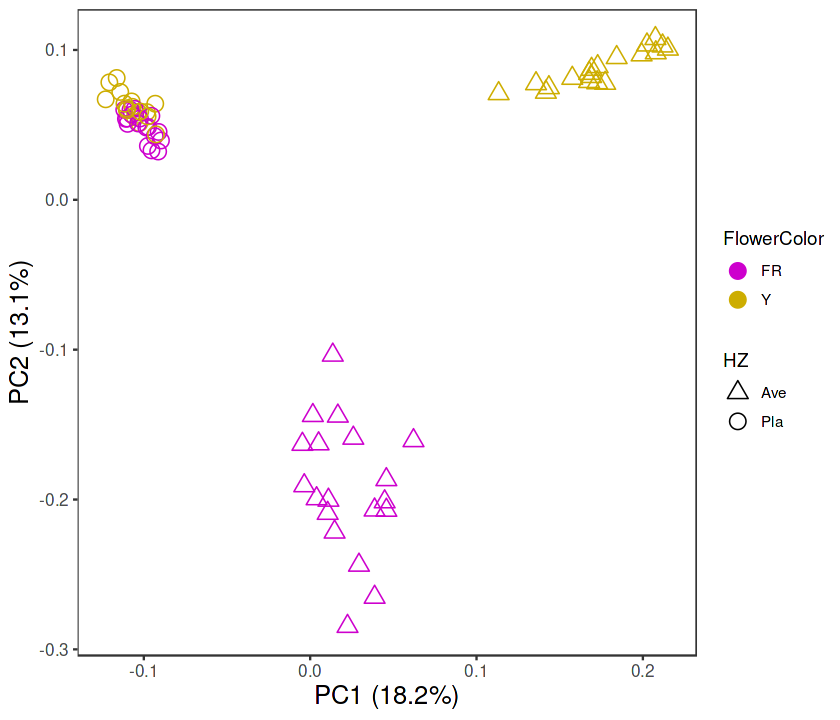

In [8]:
options(repr.plot.width=7, repr.plot.height=6)
pca12 = ggplot(pca, aes(PC1, PC2, shape = HZ, col = FlowerColor)) + 
    geom_point(size = 4) +
    scale_colour_manual(values = c(FR="magenta3", Y="gold3")) +
    scale_shape_manual(values = c(Ave = 2, Pla = 1)) +
    labs(x=paste0("PC1 (", signif(pve$var.V1[1], 3), "%)"), y=paste0("PC2 (", signif(pve$var.V1[2], 3), "%)")) +
    theme_bw() +
    theme(panel.grid = element_blank(),
          axis.text = element_text(size=10),
          axis.title = element_text(size=15))

pca12

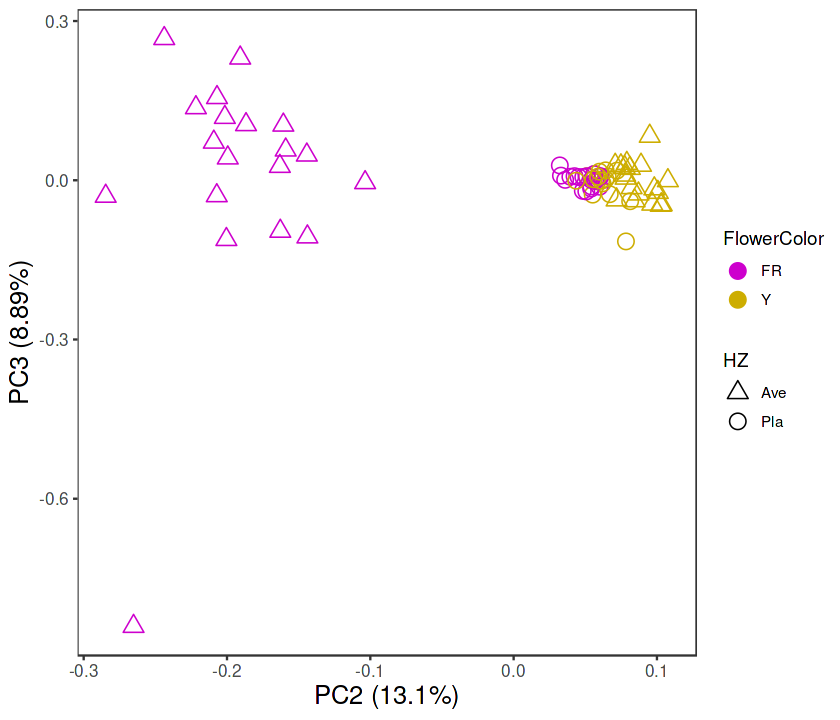

In [9]:
options(repr.plot.width=7, repr.plot.height=6)
pca23 = ggplot(pca, aes(PC2, PC3, shape = HZ, col = FlowerColor)) + 
    geom_point(size = 4) +
    scale_colour_manual(values = c(FR="magenta3", Y="gold3")) +
    scale_shape_manual(values = c(Ave = 2, Pla = 1)) +
    labs(x=paste0("PC2 (", signif(pve$var.V1[2], 3), "%)"), y=paste0("PC3 (", signif(pve$var.V1[3], 3), "%)")) +
    theme_bw() +
    theme(panel.grid = element_blank(),
          axis.text = element_text(size=10),
          axis.title = element_text(size=15))
pca23

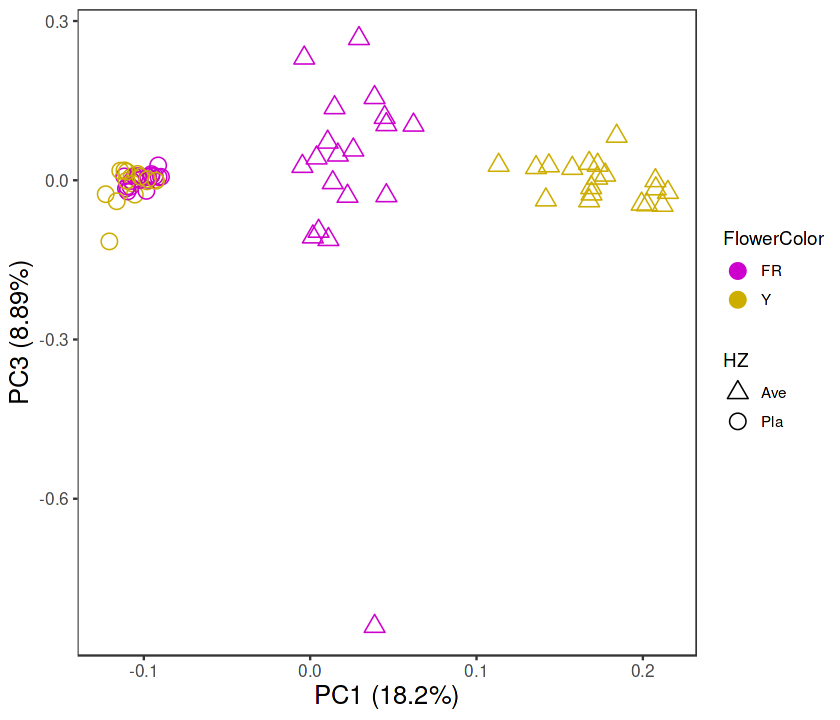

In [11]:
options(repr.plot.width=7, repr.plot.height=6)
pca13 = ggplot(pca, aes(PC1, PC3, shape = HZ, col = FlowerColor)) + 
    geom_point(size = 4) +
    scale_colour_manual(values = c(FR="magenta3", Y="gold3")) +
    scale_shape_manual(values = c(Ave = 2, Pla = 1)) +
    labs(x=paste0("PC1 (", signif(pve$var.V1[1], 3), "%)"), y=paste0("PC3 (", signif(pve$var.V1[3], 3), "%)")) +
    theme_bw() +
    theme(panel.grid = element_blank(),
          axis.text = element_text(size=10),
          axis.title = element_text(size=15))

pca13

In [56]:
pca[PC3 < -0.3]

PlantID,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
n96_Am_Ave_x3394_v3.5,0.0387397,-0.265201,-0.840433,-0.0772516,0.0645202,0.0133459,0.03461,-0.0540991,0.0176079,-0.0429623


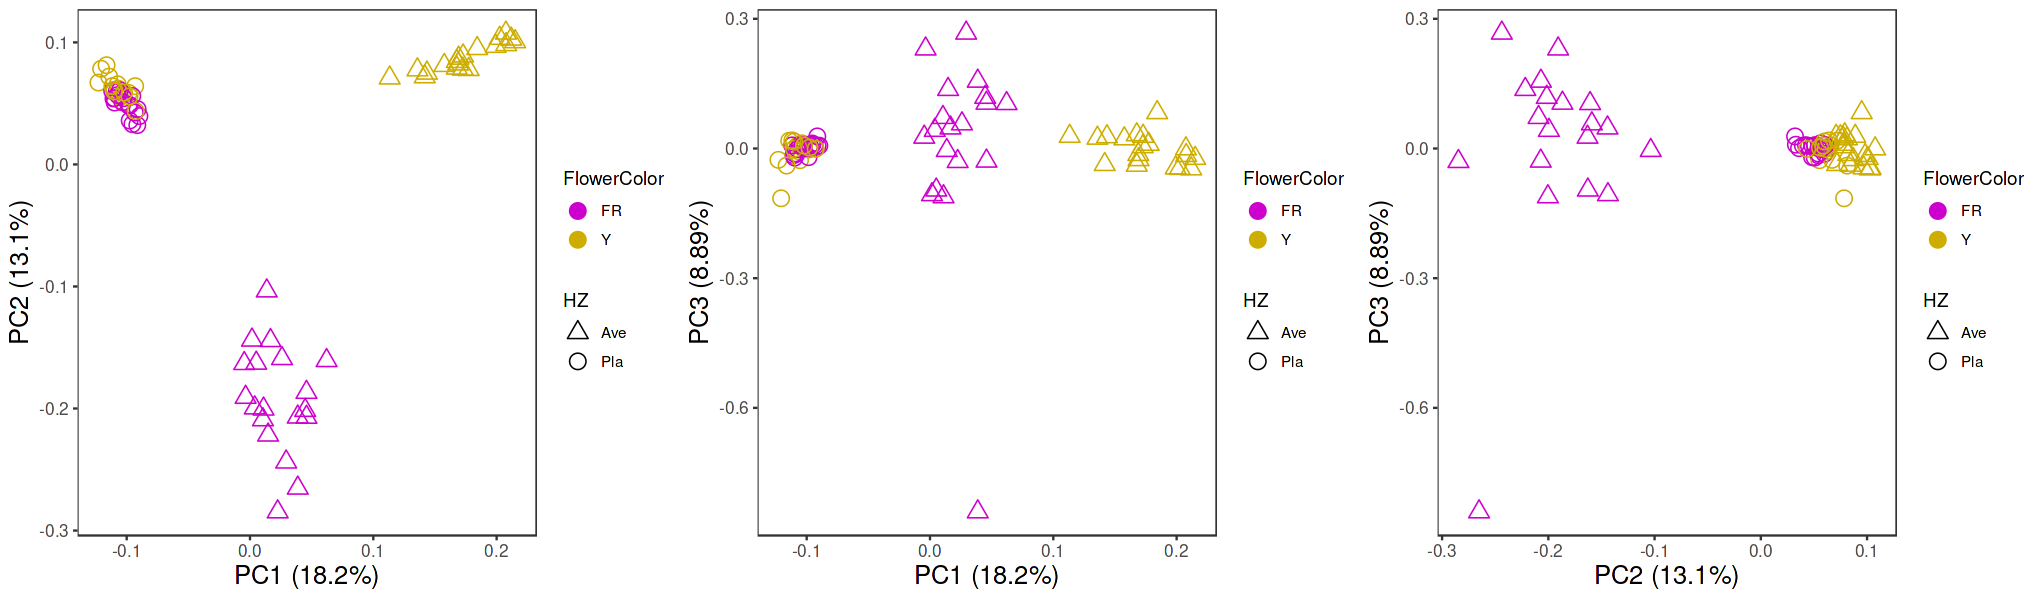

In [16]:
options(repr.plot.width=17, repr.plot.height=5)
combined_pca = grid.arrange(pca12, pca13, pca23, nrow=1)

In [23]:
ggsave(combined_pca, filename='pca.pdf', scale = 1, width=17, height=5, units='in', dpi=300)